# Compute relationship between size and syllable use

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from aging.plotting import figure, legend, format_plots, COLORMAPS, PLOT_CONFIG, save_factory

In [2]:
format_plots()
saver = save_factory(PLOT_CONFIG.save_path / "fig3", tight_layout=False)

In [3]:
def zscore(ser: pd.Series):
    return (ser - ser.mean()) / ser.std()


def demean(ser: pd.Series):
    return ser - ser.mean()


def quantile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = 'q_{:0.02f}'.format(n)
    return percentile_

In [4]:
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = pd.read_parquet(
    "/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet"
)
df = df[keep_syllables]

size_df = pd.read_parquet(
    '/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_mouse_area_df_v00.parquet'
)
age_cut = pd.cut(size_df.index.get_level_values('age'), 19)

size_df.loc[size_df['quant_0.5'] == 0, 'quant_0.5'] = np.nan
sizes_col = size_df['quant_0.5']
sizes_col = sizes_col.groupby('mouse').apply(lambda df: df.sort_index(level='age').interpolate()).droplevel(0)

# sizes_col = zscore(sizes_col.groupby(age_cut, observed=True).transform(demean))
sizes_col = sizes_col.groupby(age_cut, observed=True).transform(zscore)
sizes_col = sizes_col.fillna(0)
sizes_col = sizes_col.loc[df.index]

# make sure df matches sizes
df = df.loc[sizes_col.index]
age = df.index.get_level_values("age")

In [5]:
age_cut = pd.cut(df.index.get_level_values('age'), 19)

In [6]:
df['size'] = sizes_col

In [7]:
corrs = df.corr(method="spearman").loc["size"].iloc[:-1]

In [8]:
# shuffle size, compute correlations
shuff_df = df.copy()
sc = []
for i in range(500):
    shuff_df['size'] = df['size'].sample(frac=1, replace=False, random_state=i).to_numpy()
    shuff_corrs = shuff_df.corr(method="spearman").loc["size"].iloc[:-1]
    sc.append(shuff_corrs.rename(i))

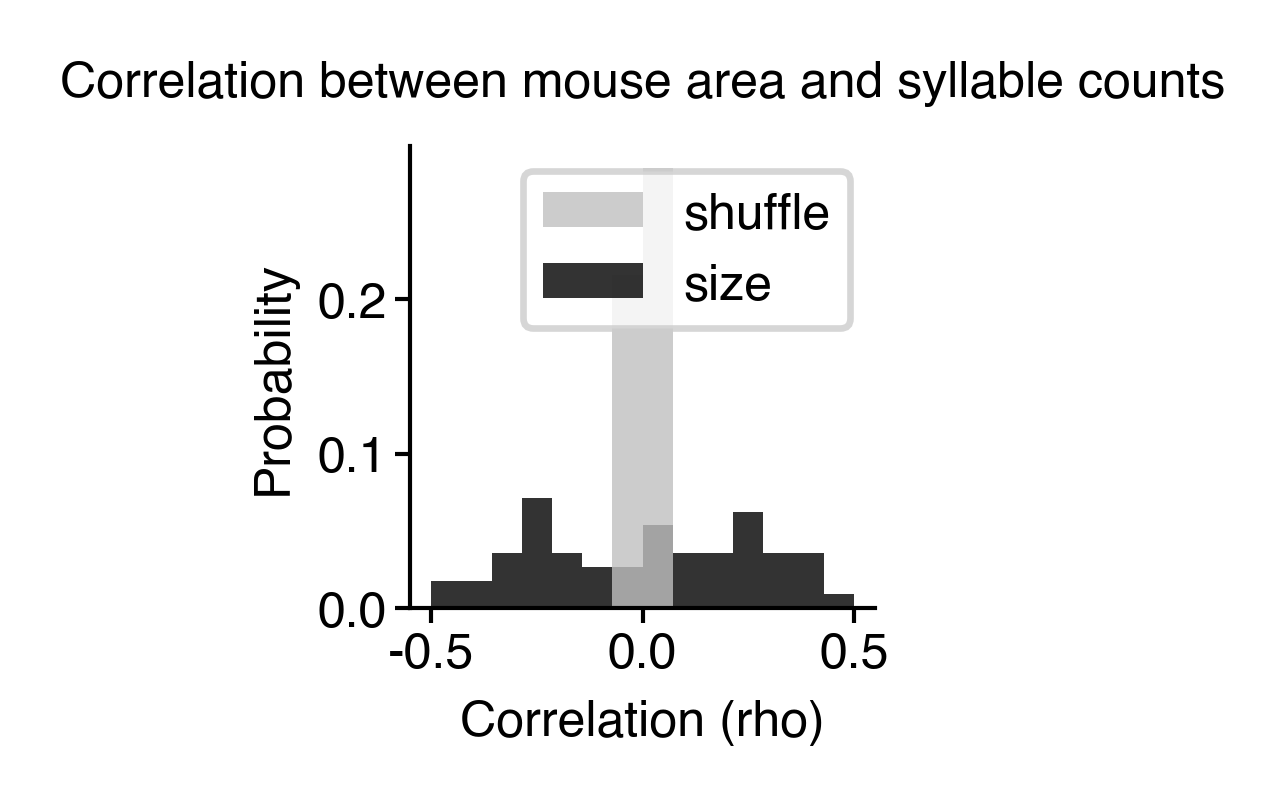

In [9]:
fig = figure(1, 1)
ax = sns.histplot(
    [pd.DataFrame(sc).mean().rename("shuffle"), corrs],
    palette=["silver", "k"],
    bins=np.linspace(-0.5, 0.5, 15),
    stat="probability",
    alpha=0.8,
    element='step',
    linewidth=0,
)
ax.set(
    xlabel="Correlation (rho)",
    title="Correlation between mouse area and syllable counts",
)
sns.despine()
saver(fig, "syllable-count-vs-size-correlation-hist");

In [10]:
# shuffle size within age cut, compute correlations
shuff_df = df.copy()
sc = []
for i in tqdm(range(500)):
    sample = df.groupby(age_cut, observed=True)['size'].transform(lambda x: x.sample(frac=1, replace=False, random_state=i).to_numpy())
    shuff_df['size'] = sample
    shuff_corrs = shuff_df.corr(method="spearman").loc["size"].iloc[:-1]
    sc.append(shuff_corrs.rename(i))
sc = pd.DataFrame(sc)

  0%|          | 0/500 [00:00<?, ?it/s]

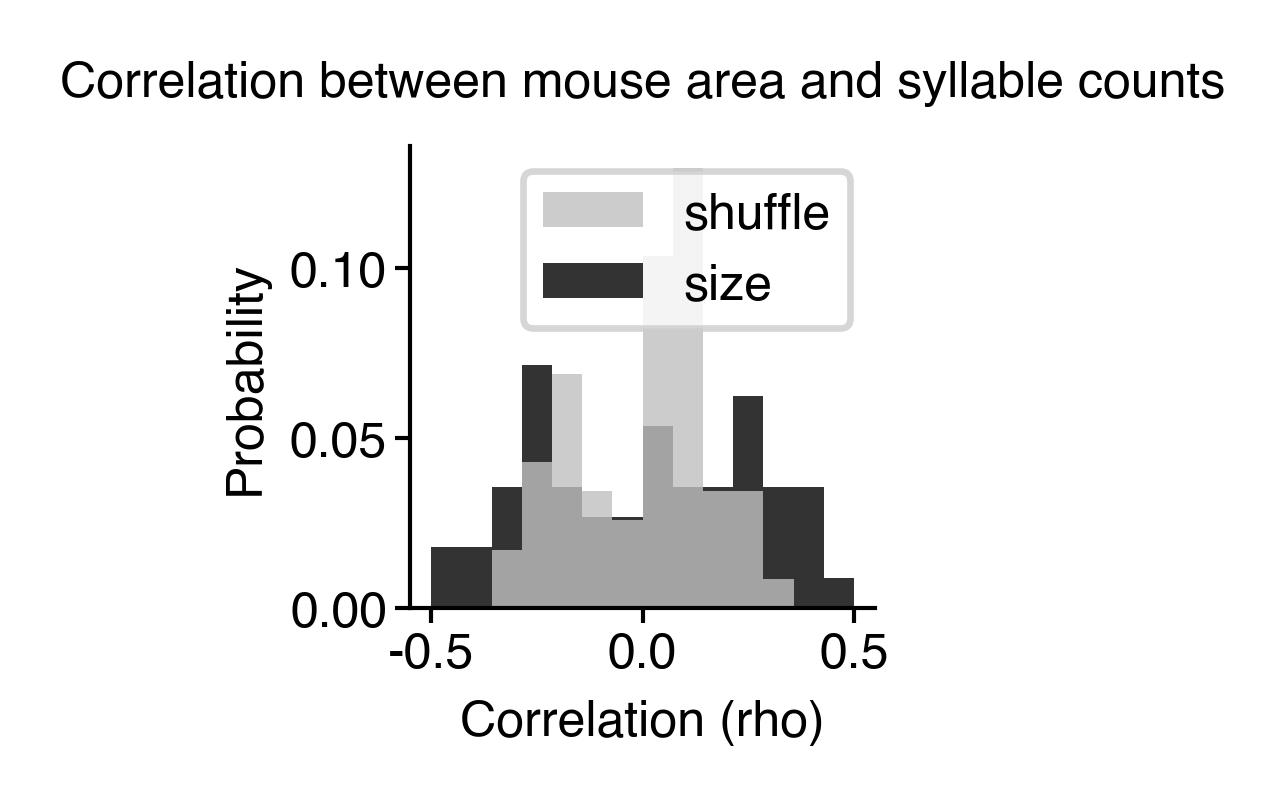

In [11]:
fig = figure(1, 1)
ax = sns.histplot(
    [sc.mean().rename("shuffle"), corrs],
    palette=["silver", "k"],
    bins=np.linspace(-0.5, 0.5, 15),
    stat="probability",
    alpha=0.8,
    element='step',
    linewidth=0,
)
ax.set(
    xlabel="Correlation (rho)",
    title="Correlation between mouse area and syllable counts",
)
sns.despine()
saver(fig, "syllable-count-vs-size-correlation-hist-within-age-shuff");

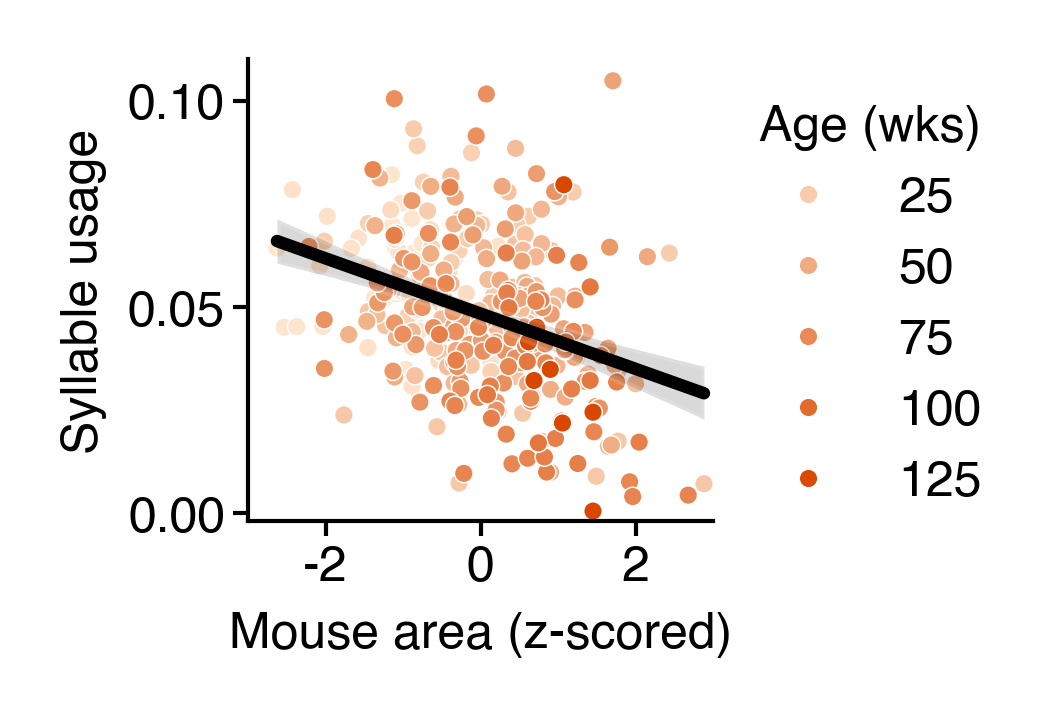

In [17]:
syllable = 42
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_female, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

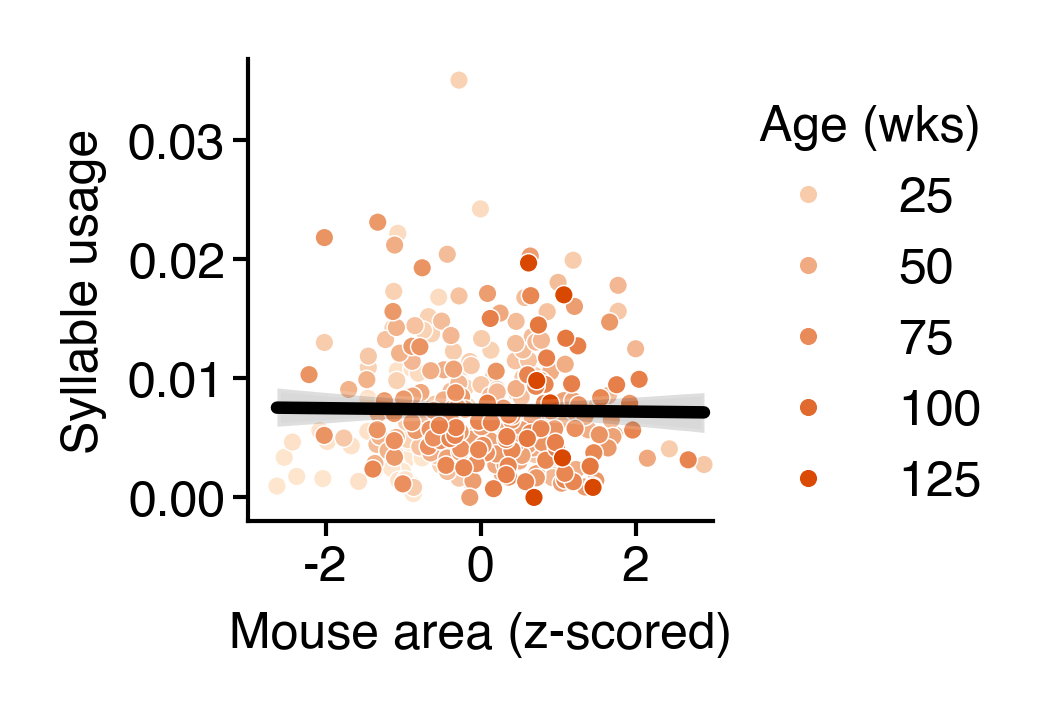

In [18]:
syllable = 84
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_female, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

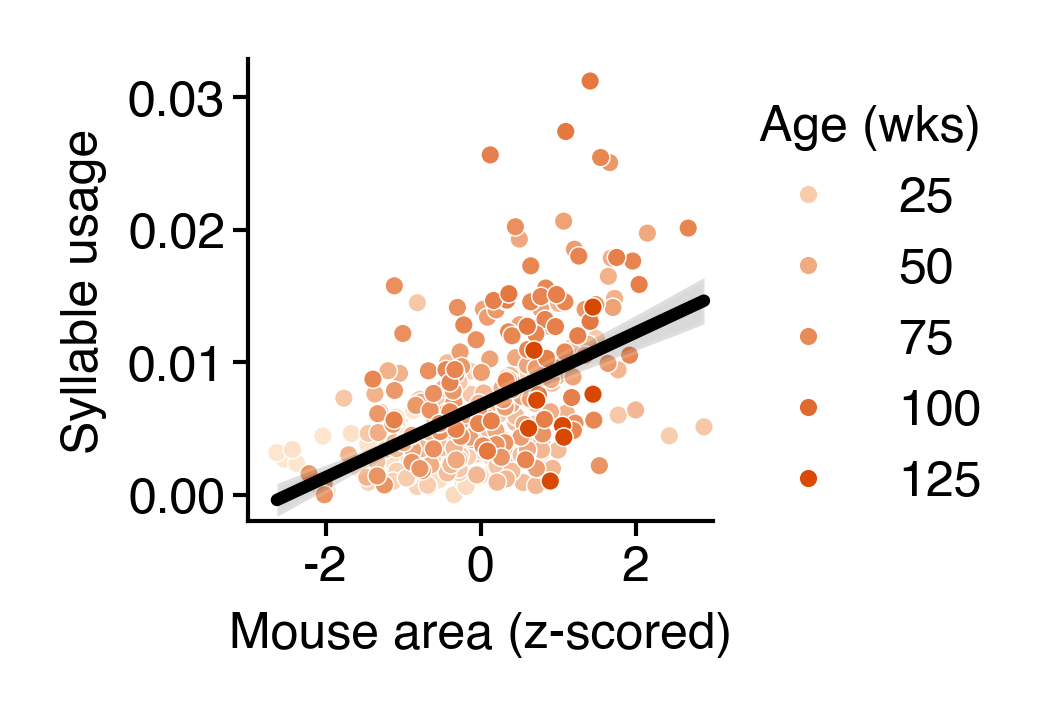

In [19]:
syllable = 25
fig = figure(1, 1)
ax = sns.scatterplot(data=df.reset_index(), x='size', y=syllable, hue='age', palette=COLORMAPS.ont_female, s=5)
sns.regplot(x=df['size'], y=df[syllable], scatter=False, color='k', ax=ax)
legend(title="Age (wks)")
ax.set(xlim=(-3, 3), ylim=(-0.002, None), xlabel="Mouse area (z-scored)", ylabel="Syllable usage")
sns.despine()
saver(fig, f"syllable-{syllable}-usage-vs-size");

In [20]:
corrs.sort_values()

syllables
12   -0.459675
62   -0.455660
69   -0.398131
49   -0.392823
42   -0.352268
52   -0.339993
85   -0.313332
11   -0.296774
60   -0.284939
41   -0.277558
73   -0.273374
9    -0.270556
76   -0.252909
10   -0.250246
24   -0.248231
27   -0.217103
53   -0.194366
6    -0.167570
13   -0.166496
36   -0.151052
44   -0.133244
32   -0.129927
23   -0.085054
70   -0.043173
59   -0.036659
84   -0.001707
68    0.017293
63    0.036792
14    0.048570
64    0.062869
67    0.064664
97    0.069603
39    0.075883
16    0.131374
71    0.137999
61    0.142599
74    0.160500
90    0.160520
33    0.177956
95    0.197373
7     0.214804
98    0.238947
30    0.239349
93    0.245812
2     0.256632
17    0.262512
83    0.272370
54    0.300229
55    0.304346
18    0.338390
79    0.353449
5     0.360411
0     0.379876
66    0.402791
77    0.411392
50    0.469829
25    0.510757
4     0.536712
Name: size, dtype: float64